# Introduction
### The data set is very messy with no exploratory name of attributes, so I add names on top of ever columns in according to the website in which data came from. The name of 26 attributes I added from left to right are: symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression,horsepower, peak-rpm,city-mpg,highway-mpg, price.  

#### Symboling corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. In  the dataset, it means the auto which has symboling 3 has highest risk while the auto which has symboling -3 has the lowest risk.

#### Normalized-losses is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification, and represents the average loss per car per year. The values range from 65 to 256. 

#### A car's make is the brand of the vehicle

#### A motor fuel is a fuel that is used to provide power to motor vehicles.

#### A naturally-aspirated engine, also known as a normally-aspirated engine, is an internal combustion engine in which oxygen intake depends solely on atmospheric pressure and does not have forced induction through a turbocharger or a supercharger. The aspiration with turbo means there is a forced induction device in auto that increases an internal combustion engine's efficiency and power output by forcing extra compressed air into the combustion chamber.

#### The fuel system is made up of the fuel tank, pump, filter, and injectors or carburetor, and is responsible for delivering fuel to the engine as needed.

#### The bore  is the diameter of each cylinder.

#### Horsepower is a unit of power used to measure the forcefulness of a vehicle's engine. The total number of miles the vehicle can go during its lifespan is also determined using horsepower.

#### RPM stands for “Revolutions per Minute.” It’s a way of measuring the speed at which the engine revolves or spins.

#### City MPG refers to driving with occasional stopping and braking, simulating the conditions you're likely to run into while driving on city streets. Miles per gallon (mpg) is the measurement of the distance in miles that a vehicle can travel using only one gallon of fuel. 

### In this project, city-mpg is the responsive variable which I want to predict. I try to predict city-mpg using linear regression model, it is my job to choose what exploratory variables are regressors. 

### The data has plenty of missing values, so I plan to try some methods to deal with missing values.

### To simpliy the data without losing too much information, I did feature interaction by multiplying 'width' 'length' 'height' together as 'volume'.

### I plotted some graphics to see the linear relationships between city-mpg and other attributes, to see which pairs have more possibility to have linear relationship which could be used as linear model to predict city-mpg.

### I also checked the correlations between the regressors I choose to use. Since the multicollinearity exists, I choose to apply PCA on the sampling data to make the prediction, and check the regression score of my regression model to decide which models are the best.


In [207]:
#import the file and important packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from numpy import linalg as LA
from sklearn.experimental import (
    enable_iterative_imputer,
)
from statsmodels.distributions.empirical_distribution  import ECDF
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
seed = 123

import pandas as pd
data = pd.read_excel("M4_Data.xls")

## Data preprocessing

#### To begin my data prepocessing, first I want to check what the types of data are in different features, check what are categorical variables, what are numeric variables, what type of numeric values are in numeric variables:

In [54]:
 #check the types of data 
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression          float64
horsepower            object
peak-rpm              object
city-mpg              object
highway-mpg           object
price                 object
dtype: object

#### After checking data types, I found there are 11 objects, which are categorical attributes, and there are 11 float type and 4 int type, which are numeric attributes. 26 attributes in all.

In [55]:
#Check the data shape
print(data.shape)
data.head(5)

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,?,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


#### After checking the data shape, I found there are 205 rows and 26 columns in the whole data set, which means there are 205*26 = 5330 datas in whole, it is pretty a lot.

#### Next step, I will check whether there are mistakes and omissions on categorical variables:

In [56]:
#Check whether there are mistakes and omissions on categorical variables.
classes = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

for each in classes:
    print(each + ':\n')
    print(list(data[each].drop_duplicates()))
    print('\n')

make:

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']


fuel-type:

['gas', 'diesel']


aspiration:

['std', 'turbo']


num-of-doors:

['two', 'four', '?']


body-style:

['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']


drive-wheels:

['rwd', 'fwd', '4wd']


engine-location:

['front', 'rear']


engine-type:

['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']


num-of-cylinders:

['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']


fuel-system:

['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']




#### The result shows there are no mistakes and omissions on categorical variables.

In [57]:
#Do a descriptive statistics check on data
data_desc = data.describe()
data_desc

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000


## After descriptive statistic checking on data, I found:

#### 1.There are 205 counts in symboling, wheel-base, length, width, height,curb-weight,engine-size,compression,city-mpg, and 203 counts in horsepower,peak-rpm, 201 counts in bore, stroke, price, and 164 counts in normalized-losses, from these information, I realized that the attribute normalized-losses have the highest number of missing values, and bore, stroke, price rank second. When dealing with missing data, the attribute normalized-losses should be put in the most important one.
#### 2. Symboling has the lowest mean, price has the highest mean value.
#### 3. Price has the largest standard deviation, while bore has the smallest standard deviation. 
#### 4. Price has the highest min value and symboling has the lowest min value, while price has the highest max value while symboling has the lowest max value.¶

#### From descriptive statistic checking, I found there are 6 attributes in numeric attributes which have missing values: horsepower, peak-rpm, bore, stroke, price and normalized-losses. Horsepower and peak-rpm have 2 missing values, bore, stroke and price have 4 missing values, while normalized-losses have 41 missing values.

## Handling the missing values

### 1. Listwise or case deletion: 
#### the most common approach to the missing data is to simply omit those cases with the missing data and analyze the remaining data. In num-of-doors, horsepower and peak-rpm, the missing values occupy less than 1% of the whole data, though price has around 1.9512% missing values, but price has little predictale value in predicting city-mpg in reason, therefore, I choose to delete missing values in price, num-of-doors, horsepower and peak-rpm.

#### Also, in the 9th row in highway-mpg term, there is a black space which makes the following analysis difficult, so I fill in blank with "?" by hand on csv file.

In [209]:
data = data.replace('?',np.nan)
data.dropna(subset=['price'], axis=0,inplace=True)
data.dropna(subset=['horsepower'], axis=0,inplace=True)
data.dropna(subset=['peak-rpm'], axis=0,inplace=True)
data.dropna(subset=['highway-mpg'],axis = 0,inplace = True)
data.dropna(subset=['city-mpg'],axis = 0,inplace = True)

### 2. Mean substitution: 
#### In a mean substitution, the mean value of a variable is used in place of the missing data value for that same variable. The theoretical background of the mean substitution is that the mean is a reasonable estimate for a randomly selected observation from a normal distribution. So let's check whether it is suitable to use mean substitution in normalized-losses, bore and stroke by checking their distributions in the following:

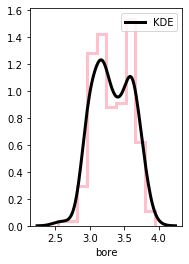

In [14]:
#histogram
plt.subplot(122)
x = data['bore'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

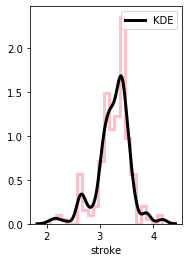

In [15]:
#histogram
plt.subplot(122)
x = data['stroke'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

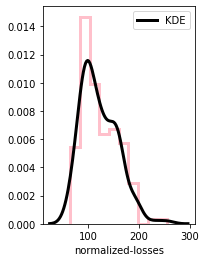

In [16]:
#histogram
plt.subplot(122)
x = data['normalized-losses'].dropna()
sns.distplot(x,hist=True,kde=True,kde_kws={"color":"k","lw":3,"label":"KDE"},hist_kws={"histtype":"step","linewidth":3,"alpha":1,"color":"pink"})

#### From the histogram I plotted, I could see, bore has two peaks in distribution, which does not satisfy the condition to be normal distribtuion, stroke is pretty fit in normal distribution, and normalized-losses is more closed to skew distribution. Based on the plot I make the conclusion, that I will fill in the missing value of stroke with mean value:

In [17]:
strokemean = data[['stroke']].mean()
strokemean
data[['stroke']] = data[['stroke']].replace(np.nan,strokemean)

### 3. Filling in missing data using KNN method: 

#### When dealing with filling in missing values of normalized-losses, I noticed normalized-losses is a skew distribution, so I chose to use KNN imputer to fill in missing data:

In [20]:
from sklearn.impute import KNNImputer
df = data['normalized-losses'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['normalized-losses'] = imputer.fit_transform(df)

#### For bore, I also use KNN imputer to fill in missing values:

In [220]:
from sklearn.impute import KNNImputer
df = data['bore'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['bore'] = imputer.fit_transform(df)

#### Remember I have filled in black space of highway-mpg with "?", so I would also use KNN method to fill in this value:

In [218]:
from sklearn.impute import KNNImputer
df = data['highway-mpg'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['highway-mpg'] = imputer.fit_transform(df)

#### Fill in missing value of city-mpg either:

In [ ]:
from sklearn.impute import KNNImputer
df = data['city-mpg'].values.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
imputer = KNNImputer(n_neighbors=2)
data['city-mpg'] = imputer.fit_transform(df)

## Turning categorical variables into quantitative variables:

#### Dummy variable is a numerical variable used to label categories. They are called ‘dummies’ because the numbers themselves don’t have inherent meaning. In the auto data-set, the “fuel-type” feature as a categorical variable has two values, “gas” or “diesel”, which are in String format. For further analysis, it has to convert into some form of numeric format. In the case where the feature “Fuel” has two unique values, gas and diesel, we create two new features ‘gas’ and ‘diesel.’ 

In [63]:
dummy_fueltype = pd.get_dummies(data['fuel-type'])
dummy_fueltype.rename(columns={'fuel-type':'gas','fuel-type':'diesel'},inplace = True)
data = pd.concat([data,dummy_fueltype],axis = 1)
data.drop('fuel-type',axis = 1, inplace = True)

#### In the auto data-set, the “aspiration” feature as a categorical variable has two values, “std” or “turbo”, which are in String format. For further analysis, it has to convert into some form of numeric format. In the case where the feature “Aspiration” has two unique values, std and turbo, we create two new features ‘std’ and ‘turbo.’ 

In [64]:
dummy_aspiration = pd.get_dummies(data['aspiration'])
dummy_aspiration.rename(columns={'aspiration':'std','aspiration':'turbo'},inplace = True)
data = pd.concat([data,dummy_aspiration],axis = 1)
data.drop('aspiration',axis = 1, inplace = True)

#### There are some features which have little significance for predictiong the city-mpg, such that: price, number of doors, engine location, so I decide to delete them:

In [65]:
data = data.drop('price', axis=1)
data = data.drop('num-of-doors', axis=1)
data = data.drop('engine-location', axis=1)

## EDA(Exploratory Data Analysis )
### Exploratory Data Analysis,is an approach to analyze data in order to:
#### 1. summarize main characteristics of the data
#### 2. gain better understanding of the data-set,
#### 3. uncover relationships between different variables, and
#### 4. extract important variables for the problem we are trying to solve

### The question here is to find “What are the characteristics that have the most impact on the city-mpg?”
##### We just go through a couple of different useful exploratory data analysis techniques in order to answer this question.

In [66]:
#Do a descriptive statistics check on data
data_desc = data.describe()
data_desc

,symboling,normalized-losses,wheel-base,engine-size,bore,stroke,compression,horsepower,peak-rpm,city-mpg,highway-mpg,volume,diesel,gas,std,turbo
count,199.000000,164.000000,199.000000,199.000000,195.000000,195.000000,199.000000,199.000000,199.000000,198.000000,1.990000e+02,199.00000,199.000000,199.000000,199.000000,199.000000
mean,0.839196,122.000000,98.824121,126.824121,3.329385,3.250308,10.178995,103.396985,5117.587940,25.232323,2.175814e-17,619470.81409,0.100503,0.899497,0.819095,0.180905
std,1.257009,35.442168,6.090838,41.752932,0.271866,0.314115,4.022424,37.553843,480.521824,6.452998,1.000000e+00,79876.37251,0.301427,0.301427,0.385910,0.385910
min,-2.000000,65.000000,86.600000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,-2.165036e+00,452643.15600,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.000000,94.500000,97.500000,3.150000,3.110000,8.550000,70.000000,4800.000000,19.000000,-8.428654e-01,566490.60000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,115.000000,97.000000,119.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.500000,-1.083260e-01,601385.70000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,150.000000,102.400000,143.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,4.793055e-01,674493.76800,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,3.417463e+00,846007.65900,1.000000,1.000000,1.000000,1.000000


## Summarize the categorical data by using the function value_counts().

In [26]:
drive_wheel_count = data['drive-wheels'].value_counts()
drive_wheel_count

fwd    116
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

#### There are 116 Front-wheel drives, 75 rear-wheel drives, 8 four-wheel drives.

In [27]:
body_style_count = data['body-style'].value_counts()
body_style_count

sedan          94
hatchback      67
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64

#### There are 94 sedan, 67 hatchback, 24 wagons, 8 hardtop and 6 convertibles body style.

In [28]:
engine_type_count = data['engine-type'].value_counts()
engine_type_count

ohc      143
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64

#### There are 143 ohc, 15 ohcf, 13 ohcv, 12 dohc, 12 l and 4 rotor of engine-type

In [29]:
numberof_cylinders_count = data['num-of-cylinders'].value_counts()
numberof_cylinders_count

four      155
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

#### There are 155 four cylinders, 24 six cylinders, 10 five cylinders, 4 eight cylinders, 4 two cylinders, 1 three cylinders and 1 twelve cylinders

In [30]:
fuel_system_count = data['fuel-system'].value_counts()
fuel_system_count

mpfi    90
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

#### There are 90 mpfi, 64 2bbl, 20 idi, 11 lbbl, 9 spdi, 3 4bbl, 1 spfi and 1 mfi

## Boxplot
### Boxplots are a great way to visualize numeric data,the boxplot shows the “median” of the data, which represents where the middle datapoint is. The Upper Quartile shows where the ”75th percentile” is, the Lower Quartile shows where the “25th percentile” is. The data between the Upper and Lower Quartile represents the Interquartile Range(IQR). There are also Lower and Upper Extremes. These are calculated as 1.5 times the interquartile range above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.
### Boxplots also display “outliers” as individual dots that occur outside the upper and lower extremes. With boxplots, I can easily spot outliers and also see the distribution and skewness of the data.

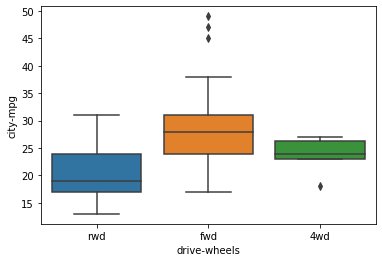

In [31]:
sns.boxplot(x='drive-wheels',y='city-mpg',data = data)

#### From boxplot with x-axis is drive-wheels and y-axis is city-mpg, I make a small conclusion that the auto has front-wheel-drives have highest mean of city-mpg, while the auto has rear-wheel-drives have lowest mean of city-mpg.

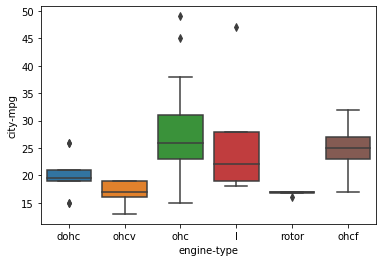

In [32]:
sns.boxplot(x='engine-type',y='city-mpg',data = data)

#### From boxplot with x-axis is engine-type and y-axis is city-mpg, I make a small conclusion that the auto has ohc have highest mean of city-mpg, while the auto has rotor and ohcv have lowest mean of city-mpg.

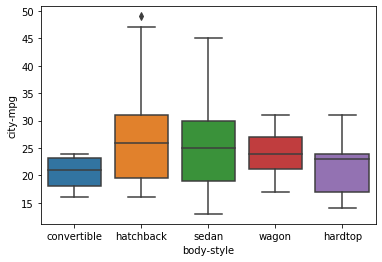

In [33]:
sns.boxplot(x='body-style',y='city-mpg',data = data)

#### From boxplot with x-axis is body-style and y-axis is city-mpg, I make a small conclusion that the auto is hatchback has highest mean of city-mpg, while the auto is convertible has lowest mean of city-mpg.

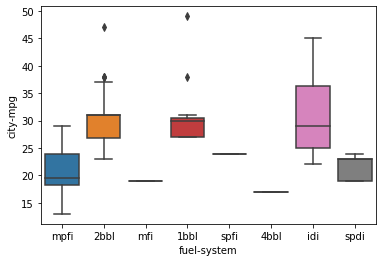

In [34]:
sns.boxplot(x='fuel-system',y='city-mpg',data = data)

#### From boxplot with x-axis is fuel-system and y-axis is city-mpg, I make a small conclusion that the auto is 2bbl has highest mean of city-mpg, while the auto is 4bbl has lowest mean of city-mpg.

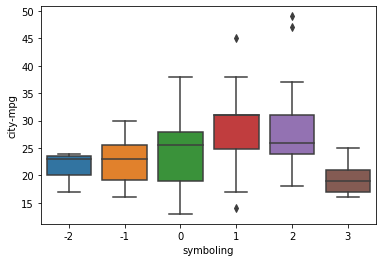

In [35]:
sns.boxplot(x='symboling',y='city-mpg',data = data)

#### From boxplot with x-axis is symboling and y-axis is city-mpg, I make a small conclusion that the auto has symboling 2 has highest mean of city-mpg, while the auto has symboling 3 has lowest mean of city-mpg.

## Feature extraction:
### In the dataset, I found there are three features: length, width and height which could be extracted as volume just by multiplying length, width and height together, therefore, I will do feature extractiom in the following code:

In [223]:
data['volume']  = data.length * data.width * data.height
data.drop(['width','length','height','curb-weight'],axis = 1, inplace = True)

### Then I want to make a boxplot with mixed features to get better macro visualization:
#### Since volume, peak-rpm, normalized-losses, engine-size, wheel-base and horsepower have very large number, for better visualization, I kicked out volume and peak-rpm in the features:

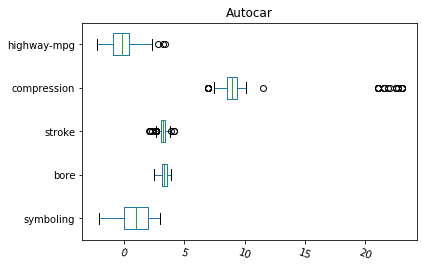

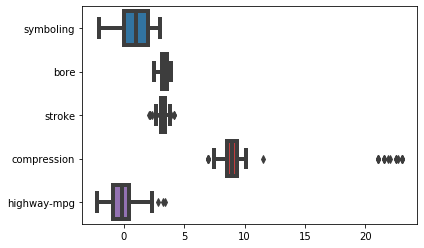

In [67]:
features = data.drop(columns=['city-mpg','volume','peak-rpm','normalized-losses','engine-size','horsepower','wheel-base','gas','diesel','turbo','std'])
features.plot.box(title='Autocar',vert=False)
plt.xticks(rotation = -20)
plt.figure()
sns.boxplot(data = features, linewidth = 4, orient = 'h')

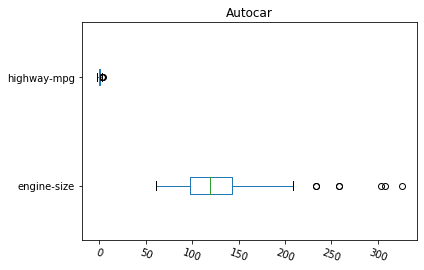

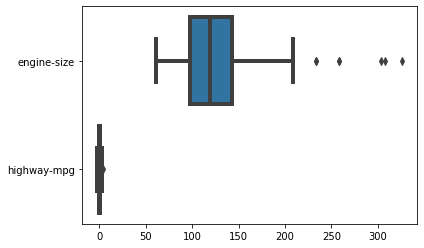

In [68]:
features = data.drop(columns=['city-mpg','normalized-losses','volume','peak-rpm','turbo','std','gas','diesel','turbo','std','horsepower','wheel-base','compression','stroke','bore','symboling'])
features.plot.box(title='Autocar',vert=False)
plt.xticks(rotation = -20)
plt.figure()
sns.boxplot(data = features, linewidth = 4, orient = 'h')

### From the boxplot above, we could see compression, stroke and engine size have more outliers.

## Gropuby
### The “groupby” method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [89]:
data_group = data[['make','num-of-cylinders','city-mpg']]
grouped_avg = data_group.groupby(['make','num-of-cylinders'],as_index=False).mean()
grouped_avg.head()

,make,num-of-cylinders,city-mpg
0,alfa-romero,four,21.0
1,alfa-romero,six,NaN
2,audi,five,18.4
3,audi,four,24.0
4,bmw,four,23.0


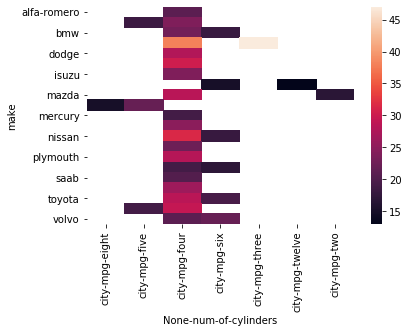

In [90]:
pivot_table = grouped_avg.pivot(index = 'make',columns = 'num-of-cylinders')
sns.heatmap(pivot_table)
plt.show()

### From our data, it seems the auto with three cylinders are, on average, the highest city-mpg, while bmw with three cylinders have highest city-mpg.

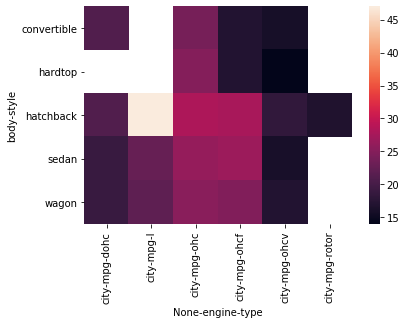

In [91]:
data_group = data[['body-style','engine-type','city-mpg']]
grouped_avg = data_group.groupby(['body-style','engine-type'],as_index=False).mean()
pivot_table = grouped_avg.pivot(index = 'body-style',columns = 'engine-type')
sns.heatmap(pivot_table)
plt.show()

### From our data, it seems the auto is hardtop and convertible on average have the highest city-mpg, while the auto is hardtop and convertible with engine-type dohc and l have highest city-mpg.

## Scatterplot

#### The predictor variable: is the variable I am using to predict an outcome. 
#### The target variable: is the variable I am trying to predict. 

### In a scatterplot, we typically set the predictor variable on the x-axis, or horizontal axis and we set the target variable on the y-axis or vertical axis.

### Let's plot plenty of scatter point to see which features have more tendency to have better linear relationship with city-mpg.
 
#### I will do scatter plot with features in the following sequence: symboling, normalized-losses, wheel-base, volume, curb-weight, engine-size, bore, stroke, compression, horsepower, peak-rpm, highway-mpg. 

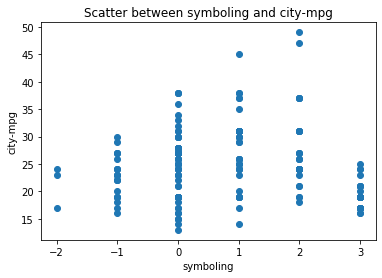

In [40]:
x = data['symboling']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between symboling and city-mpg')
plt.xlabel('symboling')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between symboling and city-mpg manifest there is hardly a linear relationship between them.

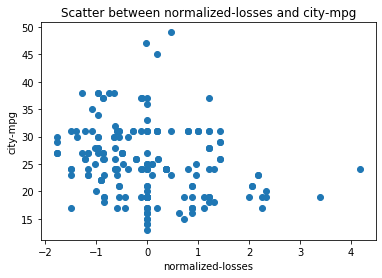

In [41]:
x = data['normalized-losses']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between normalized-losses and city-mpg')
plt.xlabel('normalized-losses')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between normalized-losses and city-mpg manifest there is hardly a linear relationship between them.

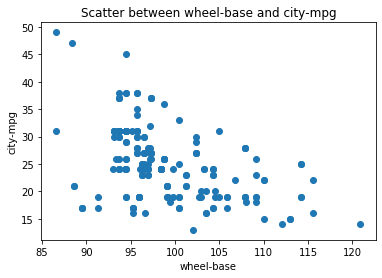

In [42]:
x = data['wheel-base']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between wheel-base and city-mpg')
plt.xlabel('wheel-base')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between wheel-base and city-mpg manifest there may be a negative linear relationship between them, but the linear model is not so apparently.

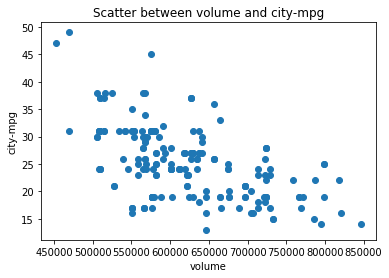

In [43]:
x = data['volume']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between volume and city-mpg')
plt.xlabel('volume')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between volume and city-mpg manifest there may be a negative linear relationship between them, but the points is a little disparse for a linear model.

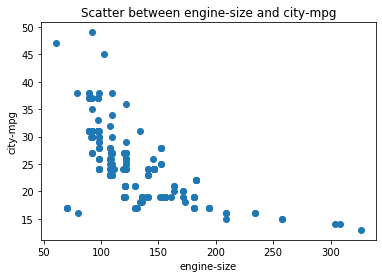

In [44]:
x = data['engine-size']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between engine-size and city-mpg')
plt.xlabel('engine-size')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between engine-size and city-mpg manifest there may be a linear relationship between them, with some outliers.

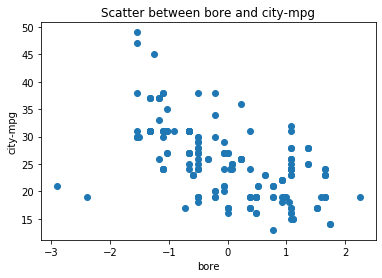

In [45]:
x = data['bore']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between bore and city-mpg')
plt.xlabel('bore')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between bore and city-mpg manifest there may be a linear relationship between them, but the points are disparse, and outliers exist.

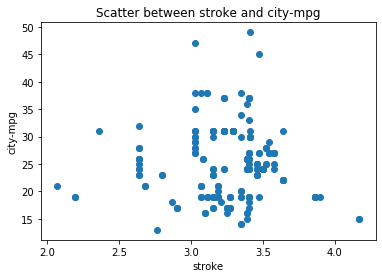

In [46]:
x = data['stroke']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between stroke and city-mpg')
plt.xlabel('stroke')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between stroke and city-mpg manifest there is hardly a linear relationship between them.

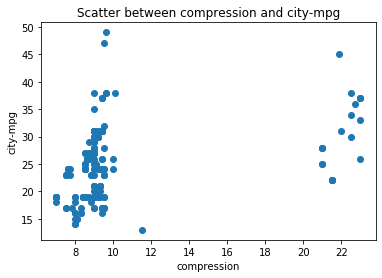

In [47]:
x = data['compression']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between compression and city-mpg')
plt.xlabel('compression')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between compression and city-mpg manifest there is hardly a linear relationship between them.

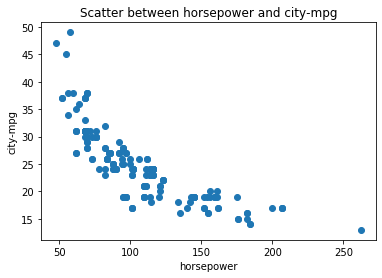

In [48]:
x = data['horsepower']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between horsepower and city-mpg')
plt.xlabel('horsepower')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between horsepower and city-mpg manifest there may be a linear relationship between them.

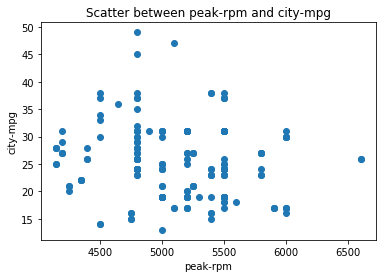

In [49]:
x = data['peak-rpm']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between peak-rpm and city-mpg')
plt.xlabel('peak-rpm')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between peak-rpm and city-mpg manifest there is hardly a linear relationship between them.

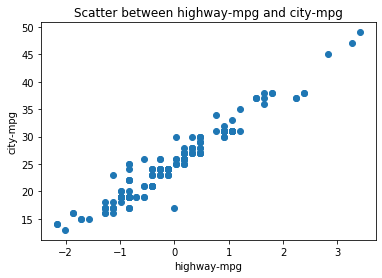

In [73]:
x = data['highway-mpg']
y = data['city-mpg']
plt.scatter(x,y)
plt.title('Scatter between highway-mpg and city-mpg')
plt.xlabel('highway-mpg')
plt.ylabel('city-mpg')
plt.show()

### The scattor plot between highway-mpg and city-mpg manifest there is a strong positive linear relationship between them.

### From scatter plot above, we know that the possible linear relatioship pairs are: 
#### wheel-base and city-mpg
#### volume and city-mpg
#### engine-size and city-mpg
#### bore and city-mpg
#### horsepower and city-mpg
#### highway-mpg and city-mpg. 
#### In these pairs, horsepower and city-mpg, highway-mpg and city-mpg are most appropriate for linear model because there are strong indication for linear relationship.

## Correlation

### To do multiple linear regression model, it is very important to check whether there are multicollinearities between dfferent independent variables, therefore, it is crucial to check the correlations between feautures which are potential to be the regressors of the linear regression model. 

## For better analysis, Let's plot heatmap for correlation matrix

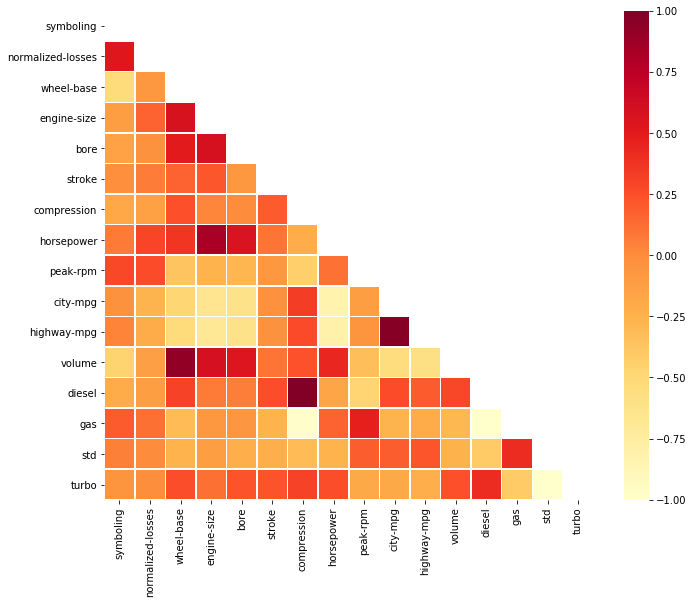

In [79]:
cor_matrix = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
#Draw the heatmap with the mask and correct aspect ratio,mask=True,upper triangular will be hide
sns.heatmap(cor_matrix, mask=mask,
            square = True, linewidths = .5, ax = ax, cmap = "YlOrRd")

### From the heatmap above, I could see, wheel-base has strong correlation with volume, horsepower has strong correlation with engine-size, compression has strong correlation with diesel, city-mpg has strong correlation with highway-mpg.

### Since highway-mpg has strong linear relationship with city-mpg, but highway-mpg has weak correlation with wheel-base, engine-size, bore, horsepower and volume, I would consider to do linear regression model on these features.

## In the following, I will choose exactly what features I would choose to be regressors

## Pearson Correlation
### The Pearson Correlation measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:
#### 1: total positive linear correlation,
#### 0: no linear correlation, the two variables most likely do not affect each other
#### -1: total negative linear correlation.

#### The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
#### By convention, when the
##### p-value is < 0.001 we say there is strong evidence that the correlation is significant,
##### the p-value is < 0.05; there is moderate evidence that the correlation is significant,
##### the p-value is < 0.1; there is weak evidence that the correlation is significant, and
##### the p-value is > 0.1; there is no evidence that the correlation is significant.


### Let’s calculate the Pearson Correlation Coefficient and P-value of each pair.

In [215]:
pearson_coef,p_value = stats.pearsonr(data['highway-mpg'],data['wheel-base'])
print("the Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P is",p_value)

the Pearson Correlation Coefficient is -0.5435631765542899 with a P-value of P is 1.53728169824608e-16


#### Since the p-value is < 0.001, the correlation between highway-mpg and wheel-base is statistically significant, although the linear relationship isn’t extremely strong (-0.543)

In [216]:
pearson_coef,p_value = stats.pearsonr(data['highway-mpg'],data['engine-size'])
print("the Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P is",p_value)

the Pearson Correlation Coefficient is -0.6824825444819698 with a P-value of P is 2.356694031793199e-28


#### Since the p-value is < 0.001, the correlation between highway-mpg and engine-size is statistically significant, although the linear relationship isn’t extremely strong (-0.682)

In [221]:
pearson_coef,p_value = stats.pearsonr(data['highway-mpg'],data['bore'])
print("the Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P is",p_value)

the Pearson Correlation Coefficient is -0.6216322767393639 with a P-value of P is 1.8896402854693365e-22


#### Since the p-value is < 0.001, the correlation between highway-mpg and bore is statistically significant, although the linear relationship isn’t extremely strong (-0.622)

In [222]:
pearson_coef,p_value = stats.pearsonr(data['highway-mpg'],data['horsepower'])
print("the Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P is",p_value)

the Pearson Correlation Coefficient is -0.8037386168104729 with a P-value of P is 7.557461756396094e-46


#### Since the p-value is < 0.001, the correlation between highway-mpg and horsepower is statistically significant, although the linear relationship isn’t extremely strong (-0.804)

In [224]:
pearson_coef,p_value = stats.pearsonr(data['highway-mpg'],data['volume'])
print("the Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P is",p_value)

the Pearson Correlation Coefficient is -0.5924259233237592 with a P-value of P is 4.738712847240091e-20


#### Since the p-value is < 0.001, the correlation between highway-mpg and volume is statistically significant, although the linear relationship isn’t extremely strong (-0.592)

### Let's try to check multicollinearity of features, then apply for linear regression model:

### Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables

In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = data[['wheel-base','engine-size','bore','volume','horsepower','highway-mpg']]
calc_vif(X)

,variables,VIF
0,wheel-base,348.108489
1,engine-size,39.231397
2,bore,1.867650
3,volume,313.623037
4,horsepower,40.128321
5,highway-mpg,3.188894


#### The table says bore and highway-mpg has less correlation with other variables in features.

## Apply for PCA. 

### As wheel-base, engine-size, volume and horsepower have strong correlation with other features, I decide to apply PCA for these features.

### PCA is effected by scale so I need to scale the features in data before applying PCA. Use StandardScaler to help me standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of machine learning algorithms. 

### Code projects the original data which is 5 dimensional into 2 dimensions. After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [303]:
from sklearn.preprocessing import StandardScaler
features = ['wheel-base', 'engine-size','volume','horsepower']
# Separating out the features
X = data.loc[:, features].values
# Separating out the target
Y = data.loc[:,['city-mpg']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

### Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.

In [304]:
finalDf = pd.concat([principalDf, data[['city-mpg']]], axis = 1)

## Explained Variance

In [305]:
pca.explained_variance_ratio_

array([0.71705144, 0.22500568])

### By using the attribute explained_variance_ratio_, I can see that the first principal component contains 71.71% of the variance and the second principal component contains 22.50% of the variance. Together, the two components contain 94.21% of the information.

## PCA to Speed-up Machine Learning Algorithms

### Split Data into Training and Test Sets
#### In this case, I chose 80% of the data to be training and 20% of the data to be in the test set.

In [306]:
X = finalDf[['principal component 1','principal component 2']].iloc[0:197,:]
Y = data['city-mpg']

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

### Standardize the Data

In [307]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

### Fit PCA on training set.

In [308]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Apply the mapping (transform) to both the training set and the test set.

In [309]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## Apply Linear Regression to the Transformed Data

### Step 1: Import the model I want to use

In [310]:
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()  
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 2: To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code:

In [311]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

0.03862052183496238
[ 0.72814175 -0.69834179]


### Step 3: Training the model on the data, predict the value.

In [312]:
Y_pred = regr.predict(X_test)

### Now compare the actual output values for X_test with the predicted values, execute the following script:

In [313]:
from sklearn import metrics
dataprediction = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
dataprediction.head(25)

,Actual,Predicted
64,0.112958,0.181051
6,-0.976340,-0.806762
23,-0.198270,-0.077753
199,-1.287569,-1.270005
57,-1.287569,-1.104538
22,0.891029,1.073500
167,-0.198270,-0.123394
60,0.112958,0.181051
74,-1.754411,-2.143888
3,-0.198270,-0.090130


### We can also visualize comparison result as a bar graph using the below script :

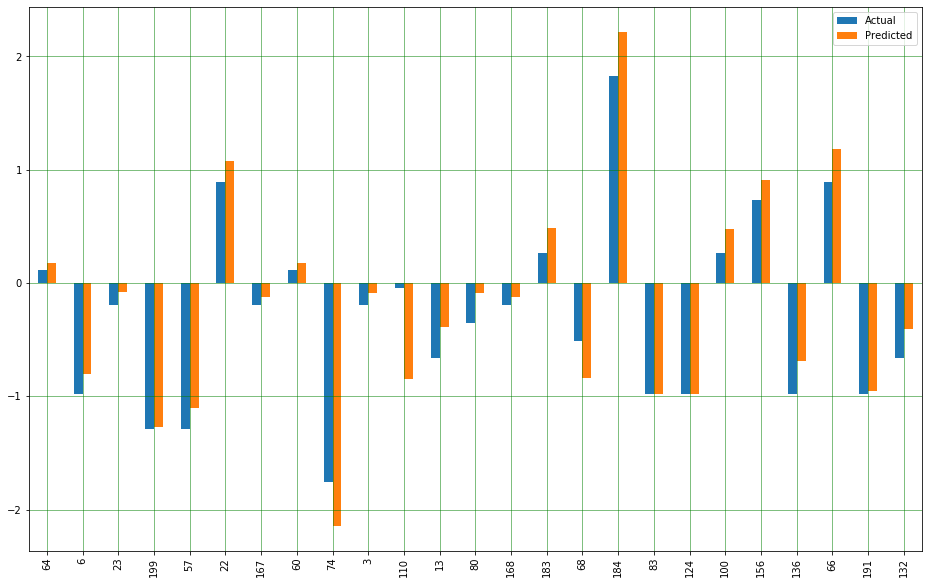

In [314]:
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### As we can observe here that our model has returned a good prediction results.
### The final step is to evaluate the performance of the algorithm. We’ll do this by 
#### 1. Finding the regression score 
#### 2. Finding the values for MAE, MSE, and RMSE. 

In [317]:
regr.score(X_test, Y_test)

0.8953290149307512

In [240]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.7691372384967486
Mean Squared Error: 1.2263676465535611
Root Mean Squared Error: 1.10741484844369


### So in this model, 89.53% of the variability in city-mpg can be explained using bore and highway-mpg.

### The Mean Absolute Error is less than 1, Root mean Squareed Error is around 1,Mean squared error is a little bigger than 1, the model is not too accuracy but can still make reasonably good predictions.

### In the above model, we regress our target "city-mpg" on PCA's component 1 and component 2, but do not forget there are two features, bore and highway-mpg which have low VIF,  so let's regress our target on those two regressors to see which regression model is better:

In [319]:
X = data[['bore', 'highway-mpg']]
Y = data['city-mpg']

### Split Data into Training and Test Sets
#### In this case, I chose 80% of the data to be training and 20% of the data to be in the test set.

In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

## Apply Linear Regression to the Standarized Data

### Step 1: Import the model I want to use

In [321]:
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()  
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 2: To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code:

In [322]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

0.007879201987931676
[-0.02074058  0.97689108]


### Step 3: Training the model on the data, predict the value.

In [323]:
Y_pred = regr.predict(X_test)

### Now compare the actual output values for X_test with the predicted values, execute the following script:

In [324]:
from sklearn import metrics
dataprediction = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
dataprediction.head(25)

,Actual,Predicted
64,0.112958,0.181051
6,-0.976340,-0.806762
23,-0.198270,-0.077753
199,-1.287569,-1.270005
57,-1.287569,-1.104538
22,0.891029,1.073500
167,-0.198270,-0.123394
60,0.112958,0.181051
74,-1.754411,-2.143888
3,-0.198270,-0.090130


### We can also visualize comparison result as a bar graph using the below script :

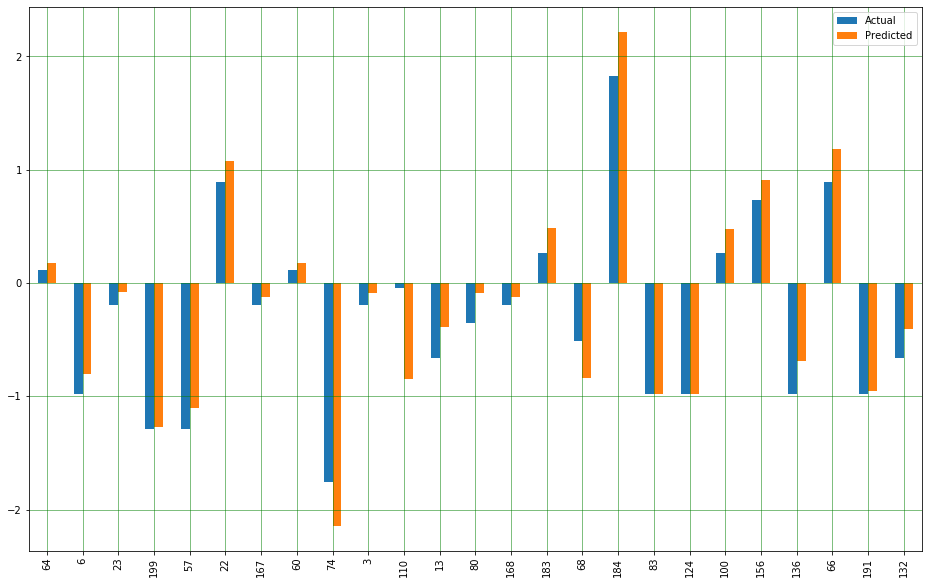

In [325]:
df1 = dataprediction.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### As we can observe here that our model has returned a good prediction results.

### The final step is to evaluate the performance of the algorithm. We’ll do this by 
#### 1. Finding the regression score 
#### 2. Finding the values for MAE, MSE, and RMSE. 

In [326]:
regr.score(X_test, Y_test)

0.8953290149307513

In [327]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.18749697916445165
Mean Squared Error: 0.06199845461200344
Root Mean Squared Error: 0.2489948887266633


### So in the second model, 89.53% of the variability in city-mpg can be explained using bore and highway-mpg.

### Comparing MAE, MSE and RMSE of the first linear regression model and the second linear regression model, we could see the second linear regression model is better.

## Conclusion
### From the long experiment, I can make the conclusions as the follow:
### 1. In lots of features, bore and highway-mpg have less multicollinearity comparing with other features.
### 2. All numeric features have correlations, which makes the simple linear regression model not the best.
### 3. PCA linear regression model: 
#### city-mpg = 0.03862052183496238 + 0.72814175* first component -0.69834179* second component.
### 4. Linear regression model regressed on bore and highway-mpg: 
#### city-mpg = 0.007879201987931676 -0.02074058* bore +  0.97689108 * highway-mpg
### 5. the second model works better comparing with MAE, MSE and RMSE.
### Both model nearly have the same regression score, the second is a little little higher.

### There are many factors that may make the model better if solved, for example :
#### Need more data:  A huge amount of data  could get the best possible prediction.
#### Poor features: The features I used have had a high enough correlation to the values we were trying to predict.
#### Other reasons: As I have tested, categorical features can make difference in city-mpg, but I did not take them into accounts in the model.